In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
# -------------------------------------------------------------------------

In [2]:
BlackFridayTrain = pd.read_csv('train.csv')

In [3]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({0: 'unmarried', 1: 'married'})
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [4]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,unmarried,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,unmarried,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,unmarried,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,unmarried,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,unmarried,8,0,0,7969


In [5]:
dummy = pd.get_dummies(BlackFridayTrain['Gender'])
dummy1 = pd.get_dummies(BlackFridayTrain['City_Category'])
dummy2 = pd.get_dummies(BlackFridayTrain['Marital_Status'])
dummy3 = pd.get_dummies(BlackFridayTrain['Occupation'])

In [6]:
# BlackFridayTrain = BlackFridayTrain.drop(['Gender','City_Category', 'Marital_Status', 'Occupation'], axis=1)

In [7]:
BlackFridayTrain = pd.concat([BlackFridayTrain, dummy, dummy1, dummy2, dummy3], axis = 1)

In [8]:
BlackFridayTrain['Marital_Status'] = BlackFridayTrain['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [9]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
BlackFridayTrain.columns

Index([                   'User_ID',                 'Product_ID',
                           'Gender',                        'Age',
                       'Occupation',              'City_Category',
       'Stay_In_Current_City_Years',             'Marital_Status',
               'Product_Category_1',         'Product_Category_2',
               'Product_Category_3',                   'Purchase',
                                'F',                          'M',
                                'A',                          'B',
                                'C',                    'married',
                        'unmarried',                            0,
                                  1,                            2,
                                  3,                            4,
                                  5,                            6,
                                  7,                            8,
                                  9,                          

In [11]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 40 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
F                             550068 non-null uint8
M                             550068 non-null uint8
A                             550068 non-null uint8
B                             550068 non-null uint8
C                             550068 non-null uint8


In [12]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,...,11,12,13,14,15,16,17,18,19,20
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713,0.246895,0.753105,0.268549,...,0.021063,0.056682,0.014049,0.049647,0.022115,0.046123,0.072796,0.012039,0.015382,0.061014
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394,0.431205,0.431205,0.443205,...,0.143594,0.231234,0.117694,0.217214,0.147059,0.209752,0.259802,0.109058,0.123066,0.239357
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
BlackFridayTrain.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
F                             0
M                             0
A                             0
B                             0
C                             0
married                       0
unmarried                     0
0                             0
1                             0
2                             0
3                             0
4                             0
5                             0
6                             0
7                             0
8                             0
9                             0
10                            0
11                            0
12      

In [14]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', yTitle='Total Purchase Amount', title='Total Purchase by Gender')

In [15]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [16]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data")

In [17]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data")

In [18]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data")

In [19]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data")

In [20]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2

In [21]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,0,10,0,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,0,10,0,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,0,0,10,0,2,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,0,0,10,0,2,0,12,14,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,1,6,16,2,4,0,8,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
# BlackFridayTrainNew['Product_Category_2'].fillna(0, inplace=True)
# BlackFridayTrainNew['Product_Category_3'].fillna(0, inplace=True)

# BlackFridayTrainNew['Product_Category_2'] = BlackFridayTrainNew['Product_Category_2'].astype(int)
# BlackFridayTrainNew['Product_Category_3'] = BlackFridayTrainNew['Product_Category_3'].astype(int)

In [23]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,0,10,0,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,0,10,0,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,0,0,10,0,2,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,0,0,10,0,2,0,12,14,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,1,6,16,2,4,0,8,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
F                             0
M                             0
A                             0
B                             0
C                             0
married                       0
unmarried                     0
0                             0
1                             0
2                             0
3                             0
4                             0
5                             0
6                             0
7                             0
8                             0
9                             0
10                            0
11                            0
12      

In [25]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,0,10,0,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,0,0,10,0,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,0,0,10,0,2,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,0,0,10,0,2,0,12,14,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,1,6,16,2,4,0,8,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
ageVsGender = BlackFridayTrainNew.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

In [27]:
ageVsGender

Gender,0,1
Age,,
0,42385978,92527205
1,205475842,708372833
2,442976233,1588794345
3,243438963,783130921
4,116706864,304136539
5,89465997,277633647
6,45782765,154984610


In [28]:
ageVsGender.iplot(kind='bar', title="Gender Distribution across various Age Groups")

In [29]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [30]:
# BlackFridayTrainNew['Product_ID'] = BlackFridayTrainNew['Product_ID'].str[2:]
# BlackFridayTrainNew['Product_ID'] = BlackFridayTrainNew['Product_ID'].astype(str).astype(int)

BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [31]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [32]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [33]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,13,14,15,16,17,18,19,20,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,...,0,0,0,0,0,0,0,0,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,...,0,0,0,0,0,0,0,0,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,...,0,0,0,0,0,0,0,0,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,...,0,0,0,1,0,0,0,0,1,0.0


In [34]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [35]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,13,14,15,16,17,18,19,20,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,...,0,0,0,0,0,0,0,0,1,0.120745
1,1000001,P00248942,0,0,10,0,2,0,1,6,...,0,0,0,0,0,0,0,0,3,0.309043
2,1000001,P00087842,0,0,10,0,2,0,12,0,...,0,0,0,0,0,0,0,0,1,0.054255
3,1000001,P00085442,0,0,10,0,2,0,12,14,...,0,0,0,0,0,0,0,0,2,0.181383
4,1000002,P00285442,1,6,16,2,4,0,8,0,...,0,0,0,1,0,0,0,0,1,0.107979


In [163]:
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,13,14,15,16,17,18,19,20,Category_Count,Product_Score
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,0.020443,0.003825,0.003896,0.003605,0.004716,...,-0.027008,0.023269,0.036969,0.005952,0.000178,0.006981,-0.029552,-0.023785,0.004270,0.003688
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,-0.011603,-0.045594,-0.000954,0.036146,0.060346,...,0.014687,-0.000399,0.017588,0.043355,0.096675,0.054313,0.002466,-0.009242,0.026808,0.020456
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.018770,-0.007422,0.015839,...,0.258550,-0.007883,0.005643,0.120574,0.049107,0.017778,-0.058017,0.018790,-0.021246,-0.020741
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,0.006712,0.012269,0.020833,...,0.090101,0.207559,0.159622,0.267114,0.383326,0.167938,0.209314,0.465970,0.011600,0.011679
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,0.016003,0.035525,0.061914,...,0.085755,-0.006622,0.005111,0.013911,0.054036,0.022007,0.004435,-0.077480,0.040739,0.109546
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.001099,-0.004629,-0.000463,...,0.029281,0.001018,0.013363,0.028370,0.012910,0.009975,-0.058008,0.040947,-0.011257,-0.010415
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,-0.067877,-0.385534,-0.343703,...,0.020272,-0.007123,-0.004792,0.006437,-0.024783,0.005509,0.003590,0.017229,-0.518270,-0.205178
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001099,-0.067877,1.000000,0.094750,0.052288,...,0.002397,0.007263,0.002254,0.003060,0.009632,-0.003532,-0.000013,-0.007812,0.444873,0.098062
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,-0.004629,-0.385534,0.094750,1.000000,0.288501,...,-0.006602,0.002857,0.008136,-0.004624,0.029622,-0.000753,-0.004603,-0.015074,0.791044,0.262332
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,-0.000463,-0.343703,0.052288,0.288501,1.000000,...,0.001007,0.010772,0.015416,0.005713,0.031099,-0.002073,-0.013769,-0.021693,0.323187,0.308641


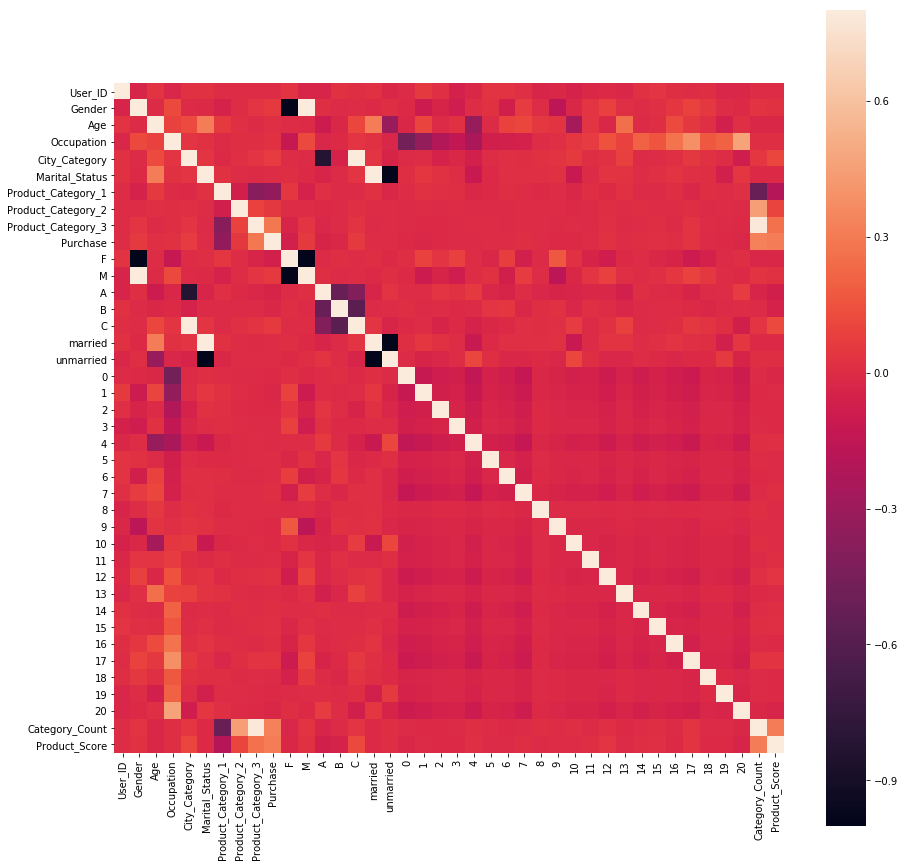

In [165]:
import seaborn as sb
C_mat = BlackFridayTrainNew.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [167]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

In [168]:
X.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,13,14,15,16,17,18,19,20,Category_Count,Product_Score
0,1000001,0,0,10,0,2,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0.120745
1,1000001,0,0,10,0,2,0,1,6,14,...,0,0,0,0,0,0,0,0,3,0.309043
2,1000001,0,0,10,0,2,0,12,0,0,...,0,0,0,0,0,0,0,0,1,0.054255
3,1000001,0,0,10,0,2,0,12,14,0,...,0,0,0,0,0,0,0,0,2,0.181383
4,1000002,1,6,16,2,4,0,8,0,0,...,0,0,0,1,0,0,0,0,1,0.107979


In [162]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions.shape)
print(y_test.shape)

predictions[0:5]

mse = np.mean((predictions - y_test)**2)
print(mse)

rmse = sqrt(mse)
print(rmse)

lm.score(X_test,y_test)

x_plot = plt.scatter(predictions, (predictions - y_test))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

predictors = X_train.columns
coef = Series(lm.coef_,predictors).sort_values()
coef.iplot(kind='bar', title='Modal Coefficients')

In [161]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
predictions = ridgeReg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ridgeReg.score(X_test,y_test))

ValueError: operands could not be broadcast together with shapes (110014,) (233599,) 

In [52]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
predictions = lassoReg.predict(X_test)

# calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", lassoReg.score(X_test,y_test))

mean square error :  20402896.72927647
root mean square error :  4516.956578192497
Score :  0.1902214690804893


In [53]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
predictions = ENreg.predict(X_test)

#calculating mse
mse = np.mean((predictions - y_test)**2)
print("mean square error : ", mse)

#calculating rmse
rmse = sqrt(mse)
print("root mean square error : ", rmse)

#Score
print("Score : ", ENreg.score(X_test, y_test))

mean square error :  21186960.591011614
root mean square error :  4602.929566158015
Score :  0.1591024524757687


In [54]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2081.0 degrees.


In [56]:
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

In [57]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features, round(importance, 2)) for features, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Product_Category_1   Importance: 0.63
Variable: User_ID              Importance: 0.1
Variable: Product_Score        Importance: 0.09
Variable: Stay_In_Current_City_Years Importance: 0.03
Variable: Age                  Importance: 0.02
Variable: Occupation           Importance: 0.02
Variable: City_Category        Importance: 0.01
Variable: Product_Category_2   Importance: 0.01
Variable: Product_Category_3   Importance: 0.01
Variable: B                    Importance: 0.01
Variable: Gender               Importance: 0.0
Variable: Marital_Status       Importance: 0.0
Variable: F                    Importance: 0.0
Variable: M                    Importance: 0.0
Variable: A                    Importance: 0.0
Variable: C                    Importance: 0.0
Variable: married              Importance: 0.0
Variable: unmarried            Importance: 0.0
Variable:                    0 Importance: 0.0
Variable:                    1 Importance: 0.0
Variable:                    2 Importance: 0.

### Testing on Model on Actual Data

In [119]:
BlackFridayTest = pd.read_csv('test.csv')

In [120]:
BlackFridayTest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [121]:
BlackFridayTest['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTest['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTest['Product_Category_2'] = BlackFridayTest['Product_Category_2'].astype(int)
BlackFridayTest['Product_Category_3'] = BlackFridayTest['Product_Category_3'].astype(int)

In [122]:
BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({0: 'unmarried', 1: 'married'})

In [123]:
dummy = pd.get_dummies(BlackFridayTest['Gender'])
dummy1 = pd.get_dummies(BlackFridayTest['City_Category'])
dummy2 = pd.get_dummies(BlackFridayTest['Marital_Status'])
dummy3 = pd.get_dummies(BlackFridayTest['Occupation'])

In [124]:
BlackFridayTest = pd.concat([BlackFridayTest, dummy, dummy1, dummy2, dummy3], axis = 1)

In [125]:
BlackFridayTest['Marital_Status'] = BlackFridayTest['Marital_Status'].map({'unmarried': 0, 'married': 1})

In [126]:
BlackFridayTestNew = BlackFridayTest.copy(deep=True)

BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTestNew.loc[BlackFridayTestNew['Age'] == '55+', 'Age'] = 6

BlackFridayTestNew.loc[BlackFridayTestNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTestNew.loc[BlackFridayTestNew['City_Category'] == 'C', 'City_Category'] = 2



conditions = [
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] == 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] == 0),
    (BlackFridayTestNew['Product_Category_1'] != 0) & (BlackFridayTestNew['Product_Category_2'] != 0) & (BlackFridayTestNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTestNew['Category_Count'] = np.select(conditions, choices, default=0)

In [127]:
BlackFridayTestNew['Product_Score'] = 0.0
required_product_data = BlackFridayTestNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,484
1,P00000242,0.0,170
2,P00000342,0.0,105
3,P00000442,0.0,34
4,P00000542,0.0,80


In [128]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [129]:
for index, row in BlackFridayTestNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTestNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [130]:
BlackFridayTestNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,13,14,15,16,17,18,19,20,Category_Count,Product_Score
0,1000004,P00128942,1,4,7,1,2,1,1,11,...,0,0,0,0,0,0,0,0,2,0.478890
1,1000009,P00113442,1,2,17,2,0,0,3,5,...,0,0,0,0,1,0,0,0,2,0.141134
2,1000010,P00288442,0,3,1,1,4,1,5,14,...,0,0,0,0,0,0,0,0,2,0.090470
3,1000010,P00145342,0,3,1,1,4,1,4,9,...,0,0,0,0,0,0,0,0,2,0.009650
4,1000011,P00053842,0,2,1,2,1,0,4,5,...,0,0,0,0,0,0,0,0,3,0.258142


## Linear Regression

In [131]:
from sklearn import linear_model

In [132]:
regr = linear_model.LinearRegression(normalize=True)

In [133]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [134]:
BlackFridayTest = pd.read_csv('test.csv')

In [135]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [136]:
y_pred = regr.predict(x_test)

In [137]:
print(y_pred)

[11755.  9613.  7598. ... 10722.  6652.  9084.]


In [138]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [139]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.02523393e-02  1.38322507e+15  1.24975358e+02 -1.64066595e+14
  1.77276811e+14  1.02052959e+01  4.01444483e+14 -2.84809345e+02
 -2.98719885e+01  5.32872160e+01 -7.55695958e+13 -1.45879466e+15
  4.30170933e+13 -1.34259718e+14 -3.11536528e+14  1.61583672e+15
  2.01728120e+15  3.93915017e+15  4.10321676e+15  4.26728335e+15
  4.43134995e+15  4.59541654e+15  4.75948314e+15  4.92354973e+15
  5.08761633e+15  5.25168292e+15  5.41574952e+15  5.57981611e+15
  5.74388271e+15  5.90794930e+15  6.07201590e+15  6.23608249e+15
  6.40014909e+15  6.56421568e+15  6.72828228e+15  6.89234887e+15
  7.05641547e+15  7.22048206e+15  6.55589499e+02  5.52368305e+03]


In [140]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11755.0
1,1000009,P00113442,9613.0
2,1000010,P00288442,7598.0
3,1000010,P00145342,7585.0
4,1000011,P00053842,10502.0


In [141]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [142]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

## Random Forest

In [152]:
# Train the model on training data
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [153]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [154]:
y_pred = rf.predict(X_test)

In [155]:
print(y_pred)

[14832.1 11124.9  5614.9 ... 11179.9 13765.6  2629.1]


In [156]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [157]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [158]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14832.1
1,1000009,P00113442,11124.9
2,1000010,P00288442,5614.9
3,1000010,P00145342,2307.9
4,1000011,P00053842,2917.9


In [159]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [160]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

In [151]:
# BlackFridayTrainNew['Product_ID'] = BlackFridayTrainNew['Product_ID'].str[2:]
# BlackFridayTrainNew['Product_ID'] = BlackFridayTrainNew['Product_ID'].astype(str).astype(int)

# BlackFridayTrainNew['Product_Score'] = 0.0
# required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

# required_product_data['Frequency'] = 1

# grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
# grouped_product_data = grouped_product_data.reset_index()

# grouped_product_data.head()


# max_frequency = grouped_product_data['Frequency'].max()

# max_frequency

# final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# final_product_data = pd.DataFrame(final_product_data)

# final_product_data.head()

# for index, row in final_product_data.iterrows():
#     product_score = (float(row['Frequency']) / float(max_frequency))
#     final_product_data.set_value(index, 'Product_Score', product_score)

# final_product_data.head()

# BlackFridayTrainNew.head()

# for index, row in data.iterrows():
#     p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
#     data.set_value(index, 'Product_Score', p_score)
# BlackFridayTrainNew.head()

## After adding the product score
### Result - RMSE 3010.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout